Hannah and Reagan have been working together between the Reagan and Hannah notebook

In [9]:
import pandas as pd
import sqlite3

In [10]:
df_movie_gross = pd.read_csv("../../data/bom.movie_gross.csv.gz")

In [11]:
df_movies = pd.read_csv("../../data/tmdb.movies.csv.gz")

In [12]:
df_budget = pd.read_csv("../../data/tn.movie_budgets.csv.gz")

In [13]:
df_info = pd.read_csv("../../data/rt.movie_info.tsv.gz", sep='\t')

In [14]:
conn = sqlite3.connect('../../data/im.db')

In [15]:
df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [16]:
df = pd.read_sql("""SELECT * FROM directors;""", conn)
df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [17]:
q = """
SELECT *
FROM movie_ratings
JOIN directors
    USING(movie_id)
;
"""
pd.read_sql(q, conn)

,movie_id,averagerating,numvotes,person_id
0,tt10356526,8.3,31,nm8353804
1,tt10356526,8.3,31,nm8353804
2,tt10384606,8.9,559,nm9250842
3,tt10384606,8.9,559,nm9932562
4,tt1042974,6.4,20,nm1915232
...,...,...,...,...
181384,tt9844256,7.5,24,nm0849465
181385,tt9844256,7.5,24,nm0849465
181386,tt9851050,4.7,14,nm1272773
181387,tt9886934,7.0,5,nm0001206


In [18]:
q = """
SELECT *
FROM persons
JOIN directors 
    USING(person_id)
;
"""
pd.read_sql(q, conn)

,person_id,primary_name,birth_year,death_year,primary_profession,movie_id
0,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569
1,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569
2,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569
3,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569
4,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt2057445
...,...,...,...,...,...,...
291166,nm9980896,Rama Narayanan,NaN,NaN,"director,writer",tt8715016
291167,nm9980896,Rama Narayanan,NaN,NaN,"director,writer",tt8919136
291168,nm9981679,Samir Eshra,NaN,NaN,"director,writer,cinematographer",tt8717234
291169,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


In [19]:
q = """
SELECT *
FROM movie_ratings
JOIN directors
    USING(movie_id)
JOIN Persons
    ON persons.person_id = directors.person_id
;
"""
df_directors = pd.read_sql(q, conn)
df_directors

,movie_id,averagerating,numvotes,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt10356526,8.3,31,nm8353804,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
1,tt10356526,8.3,31,nm8353804,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
2,tt10384606,8.9,559,nm9250842,nm9250842,Caolan Robertson,NaN,NaN,"producer,director,writer"
3,tt10384606,8.9,559,nm9932562,nm9932562,George Llewelyn-John,NaN,NaN,"director,cinematographer,writer"
4,tt1042974,6.4,20,nm1915232,nm1915232,Marcel Grant,NaN,NaN,"director,writer,producer"
...,...,...,...,...,...,...,...,...,...
181382,tt9844256,7.5,24,nm0849465,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181383,tt9844256,7.5,24,nm0849465,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181384,tt9851050,4.7,14,nm1272773,nm1272773,Prachya Pinkaew,1962.0,NaN,"producer,director,writer"
181385,tt9886934,7.0,5,nm0001206,nm0001206,Abel Ferrara,1951.0,NaN,"director,writer,soundtrack"


In [20]:
unique_df = df_directors['movie_id'].drop_duplicates()
unique_df

0         tt10356526
2         tt10384606
4          tt1042974
5          tt1043726
9          tt1060240
             ...    
181381     tt9805820
181382     tt9844256
181384     tt9851050
181385     tt9886934
181386     tt9894098
Name: movie_id, Length: 73103, dtype: object

Below is the steps Hannah and I did on 8/29/2023

In [21]:
import pandas as pd
import sqlite3

In [22]:
conn = sqlite3.connect('../../data/im.db')

In [23]:
q = """
SELECT *
FROM movie_ratings
JOIN directors
    USING(movie_id)
JOIN Persons
    ON persons.person_id = directors.person_id
;
"""
pd.read_sql(q, conn)
df_directors = pd.read_sql(q, conn)
df_directors

,movie_id,averagerating,numvotes,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt10356526,8.3,31,nm8353804,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
1,tt10356526,8.3,31,nm8353804,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
2,tt10384606,8.9,559,nm9250842,nm9250842,Caolan Robertson,NaN,NaN,"producer,director,writer"
3,tt10384606,8.9,559,nm9932562,nm9932562,George Llewelyn-John,NaN,NaN,"director,cinematographer,writer"
4,tt1042974,6.4,20,nm1915232,nm1915232,Marcel Grant,NaN,NaN,"director,writer,producer"
...,...,...,...,...,...,...,...,...,...
181382,tt9844256,7.5,24,nm0849465,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181383,tt9844256,7.5,24,nm0849465,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181384,tt9851050,4.7,14,nm1272773,nm1272773,Prachya Pinkaew,1962.0,NaN,"producer,director,writer"
181385,tt9886934,7.0,5,nm0001206,nm0001206,Abel Ferrara,1951.0,NaN,"director,writer,soundtrack"


In [24]:
df_duplicates = df_directors.drop_duplicates()
df_duplicates

,movie_id,averagerating,numvotes,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt10356526,8.3,31,nm8353804,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
2,tt10384606,8.9,559,nm9250842,nm9250842,Caolan Robertson,NaN,NaN,"producer,director,writer"
3,tt10384606,8.9,559,nm9932562,nm9932562,George Llewelyn-John,NaN,NaN,"director,cinematographer,writer"
4,tt1042974,6.4,20,nm1915232,nm1915232,Marcel Grant,NaN,NaN,"director,writer,producer"
5,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
...,...,...,...,...,...,...,...,...,...
181381,tt9805820,8.1,25,nm3828616,nm3828616,Alexandru Mavrodineanu,NaN,NaN,"director,writer,cinematographer"
181382,tt9844256,7.5,24,nm0849465,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181384,tt9851050,4.7,14,nm1272773,nm1272773,Prachya Pinkaew,1962.0,NaN,"producer,director,writer"
181385,tt9886934,7.0,5,nm0001206,nm0001206,Abel Ferrara,1951.0,NaN,"director,writer,soundtrack"


In [25]:
df_duplicates.drop(columns=['death_year','birth_year', 'person_id', 'primary_profession'],inplace=True)

C:\Users\rnewswanger\AppData\Local\Temp\ipykernel_7020\3689436568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicates.drop(columns=['death_year','birth_year', 'person_id', 'primary_profession'],inplace=True)


In [26]:
df_duplicates

,movie_id,averagerating,numvotes,primary_name
0,tt10356526,8.3,31,Sukh Sanghera
2,tt10384606,8.9,559,Caolan Robertson
3,tt10384606,8.9,559,George Llewelyn-John
4,tt1042974,6.4,20,Marcel Grant
5,tt1043726,4.2,50352,Renny Harlin
...,...,...,...,...
181381,tt9805820,8.1,25,Alexandru Mavrodineanu
181382,tt9844256,7.5,24,Gorô Taniguchi
181384,tt9851050,4.7,14,Prachya Pinkaew
181385,tt9886934,7.0,5,Abel Ferrara


Step 1. Filter primary names that occur 5 or more times
Step 2 Filter by primary names
Step 3 Mean of filtered data
Step 4 Top 10 mean ratings

In [58]:
# Step 1
filtered_names = df_duplicates['primary_name'].value_counts()[df_duplicates['primary_name'].value_counts() >= 5].index

# Step 2
filtered_data = df_duplicates[df_duplicates['primary_name'].isin(filtered_names)]

# Step 3
mean_averagerating_filtered = filtered_data.groupby('primary_name')['averagerating'].mean()

# Step 4
top_10_ratings = mean_averagerating_filtered.nlargest(10)

# print
print("Top 10 Primary Names with the Highest Mean Averagerating:")
print(top_10_ratings)


Top 10 Primary Names with the Highest Mean Averagerating:
primary_name
Yasmine Asha        8.940000
Ian Cranston        8.800000
Miguel Gaudêncio    8.720000
Zheng Zhou          8.700000
Tom Logan           8.637500
Steve Ravic         8.528571
Branko Istvancic    8.520000
Carlos Nader        8.460000
Ross MacGibbon      8.357143
Nick Wickham        8.285714
Name: averagerating, dtype: float64


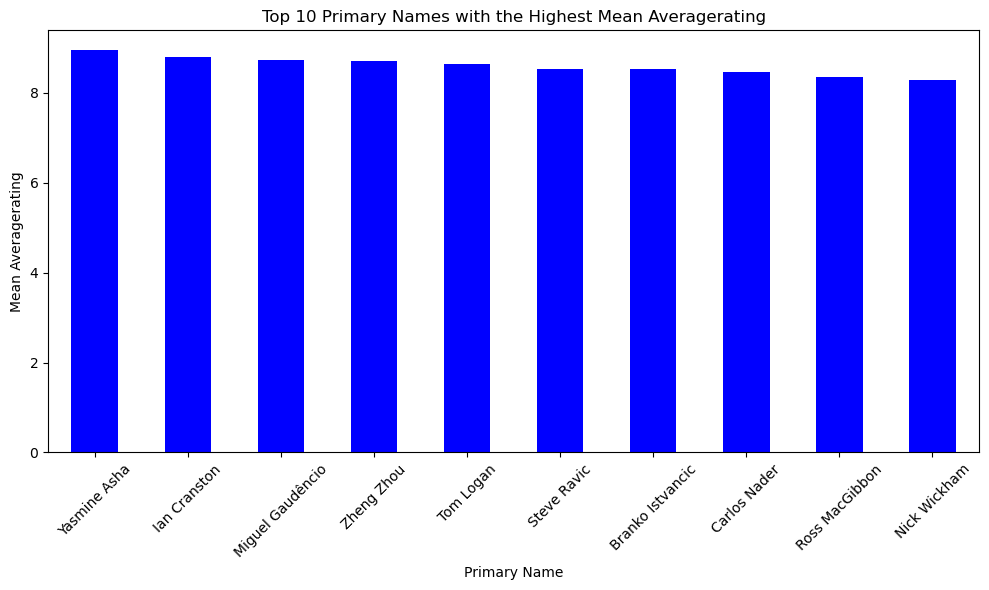

In [59]:
plt.figure(figsize=(10, 6))
top_10_ratings.plot(kind='bar', color='blue')
plt.xlabel('Primary Name')
plt.ylabel('Mean Averagerating')
plt.title('Top 10 Primary Names with the Highest Mean Averagerating')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()


In [27]:
df_duplicates.value_counts("primary_name").head(10)

primary_name
Sergey A.              39
Nayato Fio Nuala       37
Larry Rosen            34
Dustin Ferguson        31
Jason Impey            30
Michael Fredianelli    28
Paul T.T. Easter       28
Tony Newton            27
David DeCoteau         27
William Winckler       25
dtype: int64

In [40]:
selected_rows = df_duplicates.query("primary_name == 'Sergey A.'")
selected_rows

,movie_id,averagerating,numvotes,primary_name
10539,tt8220556,8.0,28,Sergey A.
19415,tt6067750,7.0,55,Sergey A.
21237,tt4654864,7.1,29,Sergey A.
22713,tt4654818,7.5,33,Sergey A.
44205,tt5970646,7.3,37,Sergey A.
44565,tt6737634,6.7,37,Sergey A.
46850,tt7579702,6.7,31,Sergey A.
50606,tt7640228,5.8,48,Sergey A.
53202,tt4168808,7.1,138,Sergey A.
56963,tt6498526,7.2,42,Sergey A.


In [38]:
averagerating_values =  selected_rows['averagerating']
mean_aveeragerating_sergey = sum(averagerating_values) / len(averagerating_values)
print(mean_aveeragerating_sergey )

7.441025641025644


Step 1. Grouped the data by the primary_name, calculated the mean, and counted the number of "movie_id"
Step 2. Rename the columns
Step 3. Sort movie count and selected the top 10
Step 4. Find the mean of the top 10 primary names
Step 5. Print top 10 names, mean, and movie count

In [52]:
# Step 1
grouped_data = df_duplicates.groupby('primary_name').agg({'averagerating': 'mean', 'movie_id': 'size'})

# Step 2
grouped_data.rename(columns={'averagerating': 'mean_averagerating', 'movie_id': 'movie_count'}, inplace=True)

# Step 3
top_10_names = grouped_data.sort_values(by='movie_count', ascending=False).head(10)

# Step 4
mean_averagerating_top_10 = top_10_names['mean_averagerating'].mean()

# Print the top 10 names, their mean averagerating, and the mean of averagerating for the top 10 names
print(top_10_names)
print("\nMean Averagerating for Top 10 Names:", mean_averagerating_top_10)


                     mean_averagerating  movie_count
primary_name                                        
Sergey A.                      7.441026           39
Nayato Fio Nuala               4.713514           37
Larry Rosen                    7.405882           34
Dustin Ferguson                4.003226           31
Jason Impey                    5.543333           30
Michael Fredianelli            6.182143           28
Paul T.T. Easter               3.285714           28
Tony Newton                    5.218519           27
David DeCoteau                 3.400000           27
William Winckler               6.980000           25

Mean Averagerating for Top 10 Names: 5.417335630864093


Create a bar char with the above data

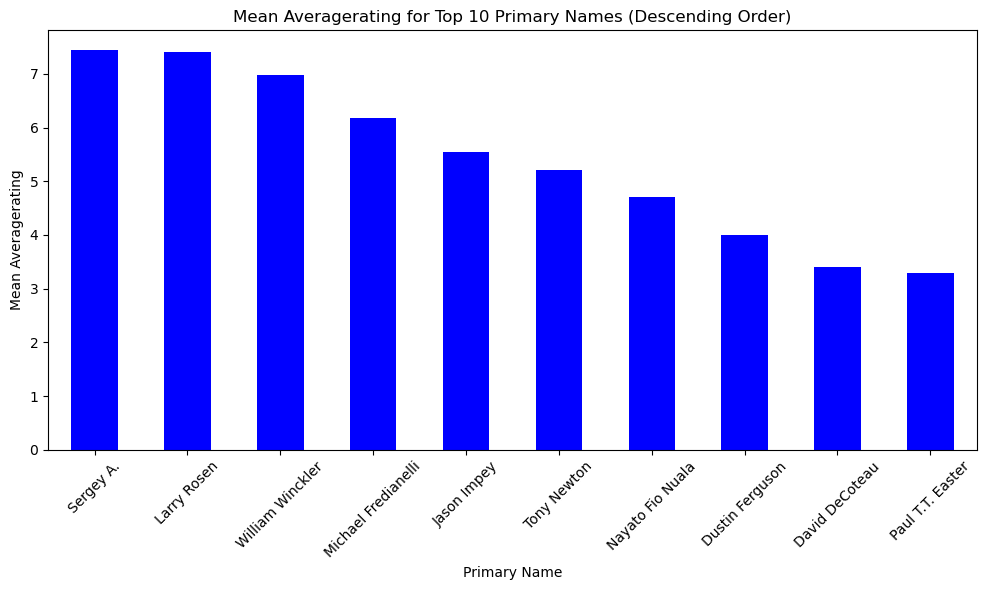

In [50]:
top_10_names_sorted = top_10_names.sort_values(by='mean_averagerating', ascending=False)

plt.figure(figsize=(10, 6))
top_10_names_sorted['mean_averagerating'].plot(kind='bar', color='blue')
plt.xlabel('Primary Name')
plt.ylabel('Mean Averagerating')
plt.title('Mean Averagerating for Top 10 Primary Names (Descending Order)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()